# 📊 Credit Card Fraud Detection with Keras ANN

## Introduction 📝
This notebook aims to explore and model the credit card fraud detection dataset from Kaggle. We will use a deep learning approach, specifically an artificial neural network (ANN) using Keras, to predict fraudulent transactions.

## Dataset Overview 🔍
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 87,403 frauds out of 1 million transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

The dataset can be found here: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data)


## 🛠️Import Libraries 
First, we import all necessary libraries for handling data, creating visualizations, and building our neural network model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential

## 🔍Load the Data 
 
Load the dataset into a DataFrame.

In [2]:
path = '.\card_transdata.csv'
df = pd.read_csv(path)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11552\806378118.py:1: SyntaxWarning: invalid escape sequence '\c'
  path = '.\card_transdata.csv'


## 🔄 Preprocessing the Data

In this section, we will prepare our dataset for modeling. This includes handling missing values, scaling features, and splitting the data into training and test sets. Additionally, we will conduct an exploratory data analysis to understand the nature of our dataset better.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [32]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [28]:
print("distance_from_home nulls :",df["distance_from_home"].isnull().sum())
print("distance_from_last_transaction nulls :",df["distance_from_last_transaction"].isnull().sum())
print("ratio_to_median_purchase_price nulls :",df["ratio_to_median_purchase_price"].isnull().sum())
print("repeat_retailer nulls :",df["repeat_retailer"].isnull().sum())
print("used_chip nulls :",df["used_chip"].isnull().sum())
print("used_pin_number nulls :",df["used_pin_number"].isnull().sum())
print("online_order nulls :",df["online_order"].isnull().sum())
print("fraud nulls :",df["fraud"].isnull().sum())

distance_from_home nulls : 0
distance_from_last_transaction nulls : 0
ratio_to_median_purchase_price nulls : 0
repeat_retailer nulls : 0
used_chip nulls : 0
used_pin_number nulls : 0
online_order nulls : 0
fraud nulls : 0


In [37]:
print("value counts of",df['repeat_retailer'].value_counts())
print("value counts of",df['used_chip'].value_counts())
print("value counts of",df['used_pin_number'].value_counts())
print("value counts of",df['online_order'].value_counts())
print("value counts of",df['fraud'].value_counts())

value counts of repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64
value counts of used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64
value counts of used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64
value counts of online_order
1.0    650552
0.0    349448
Name: count, dtype: int64
value counts of fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [30]:
print("duplicates :",df.duplicated().sum())

duplicates : 0


## 📊 Data Visualization

Visualizing the dataset is crucial for understanding the underlying patterns and insights, which can significantly influence our modeling strategy. 

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11552\2973380224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11552\2973380224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11552\2973380224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="pastel")
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11552\2973380224.py:6: FutureWarning: 

Passing `palette` w

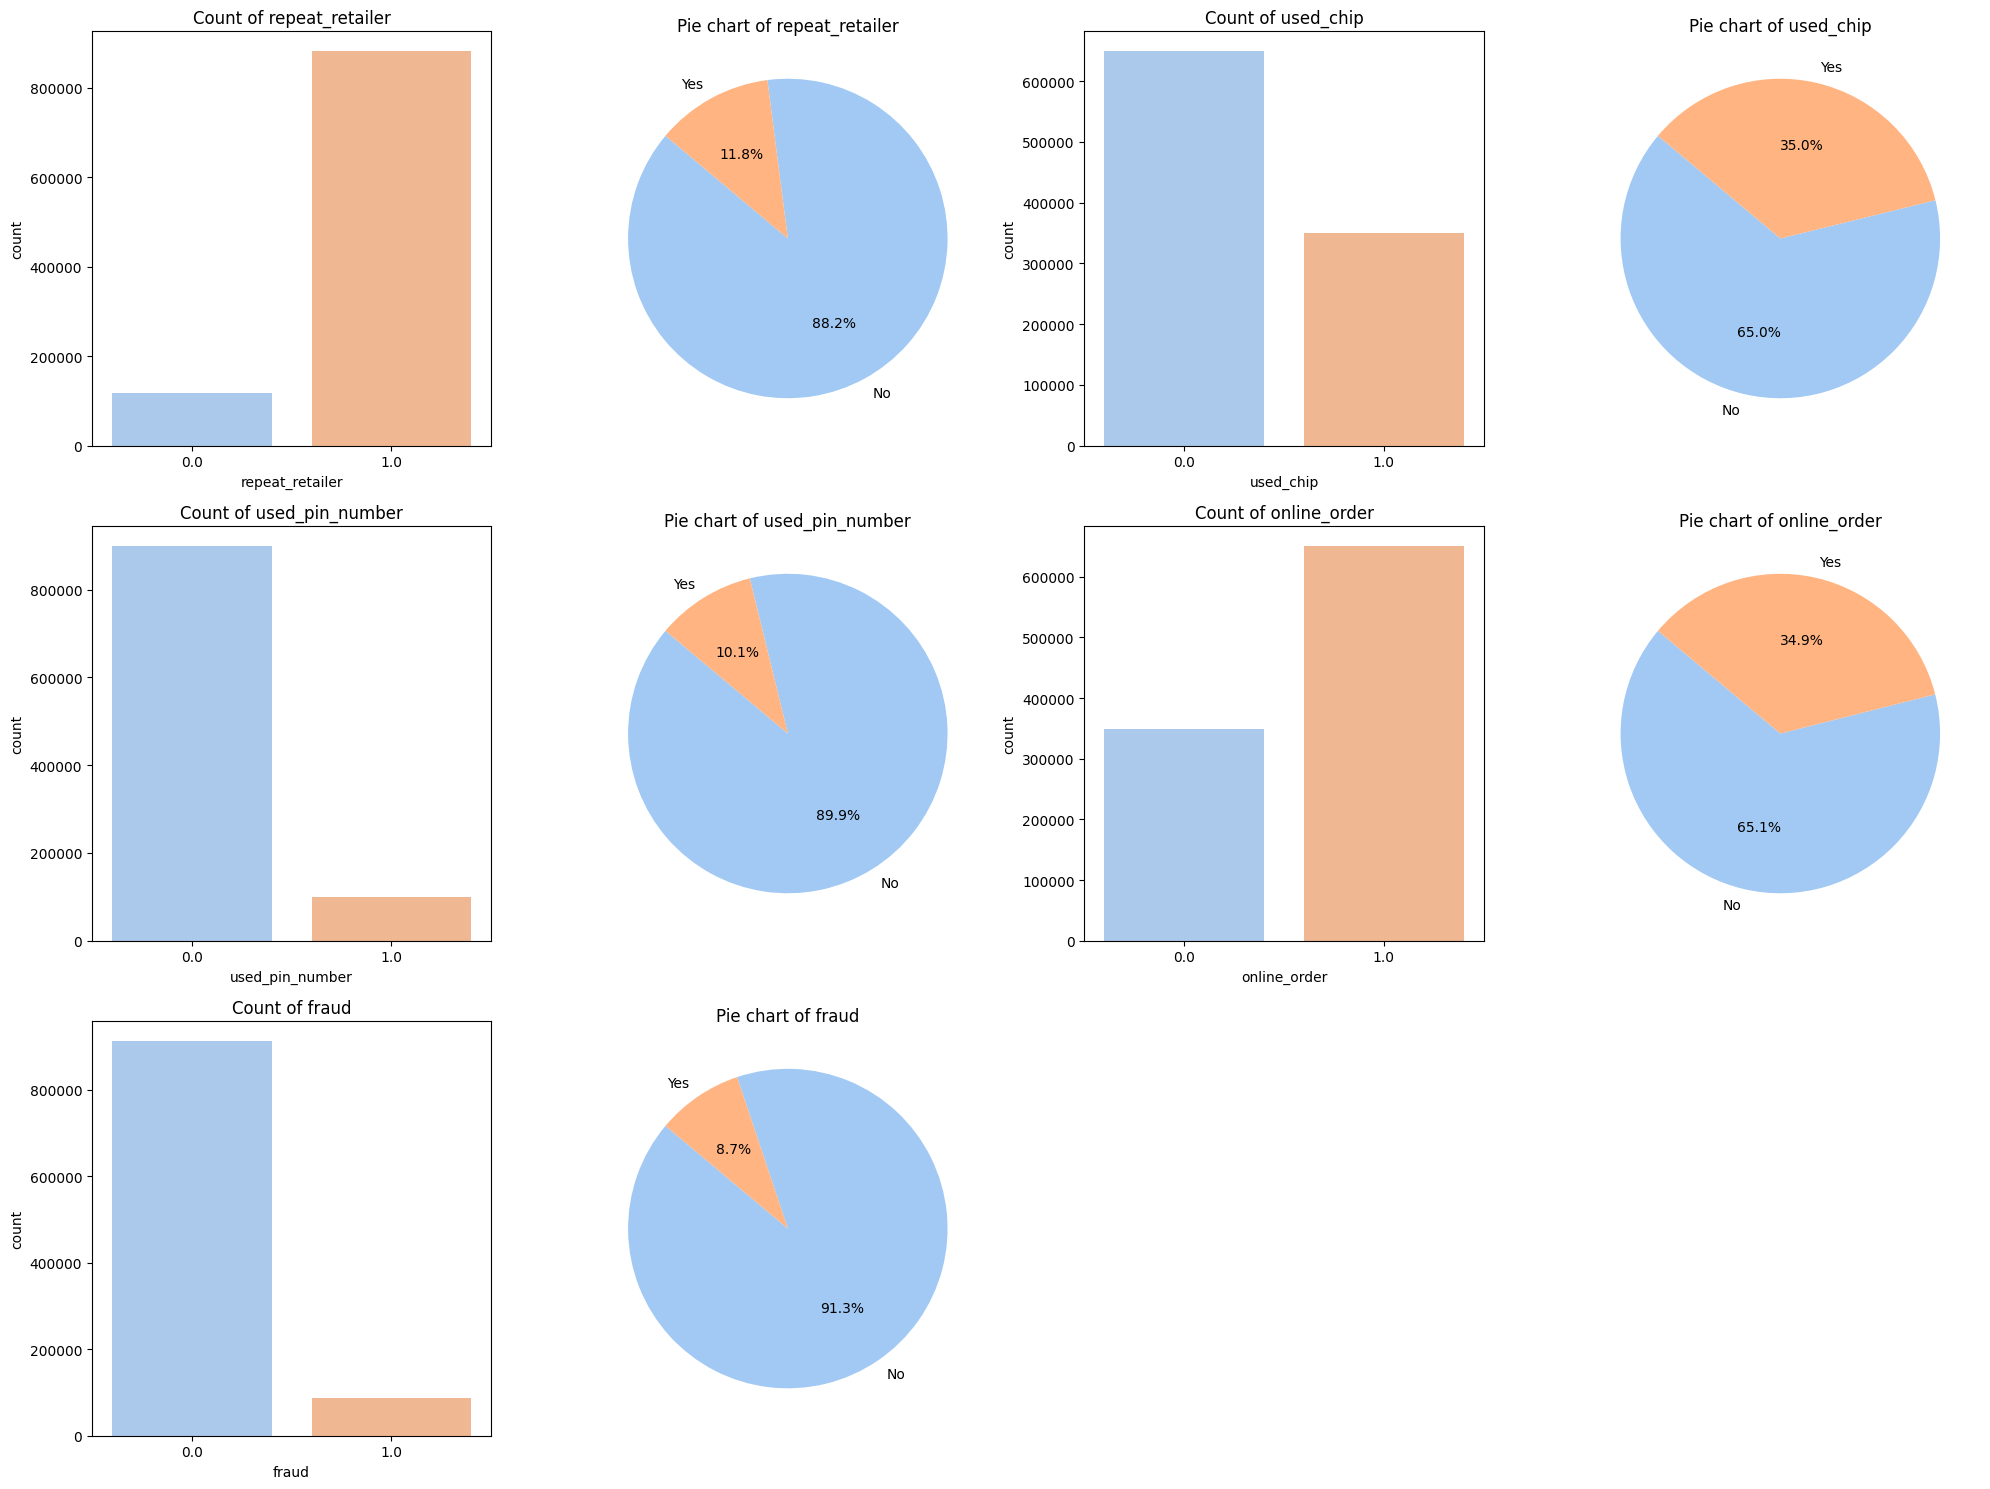

In [44]:
plt.figure(figsize=(20, 15))
binary_vars = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
for i, col in enumerate(binary_vars):
    # Count plot
    plt.subplot(3, 4, 2*i+1)
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f'Count of {col}')
    # Pie chart
    plt.subplot(3, 4, 2*i+2)
    plt.pie(df[col].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f'Pie chart of {col}')
plt.tight_layout()
plt.show()

### The data is clearly imbalanced, which impacts our model building strategy.

## 🛠️ Data Preprocessing

Preprocessing numerical features to make them suitable for model input. This step is crucial to ensure that our machine learning model does not get biased by the scale of the features.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numerical = ['distance_from_home',
             'distance_from_last_transaction',
             'ratio_to_median_purchase_price',
             ]

preprocessor = ColumnTransformer(
    [
        ('numerical', StandardScaler(), numerical),
    ],
    remainder='passthrough',
)


## 🔄 Data Splitting

Before we proceed with building our model, it's crucial to split the dataset into inputs and output then into training and testing sets. This practice helps in validating the performance of our model on unseen data, ensuring that we have a robust model that generalizes well outside of the training data.

In [ ]:
target ='fraud'
x =df.drop(columns=[target]).values
y =df[target].values

In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
train_x = np.array(train_x)
test_x = np.array(test_x)
train_y = np.array(train_y)
test_y = np.array(test_y)


## ⚖️ Class Weights Calculation for Imbalanced Data

In this section, we deal with imbalanced classes in our training data. When one class is much more common than others, it can bias our model. Instead of using techniques like SMOTE, which might not work well with neural networks, we're calculating class weights. This adjusts the training process to give more importance to minority classes, helping our model perform better overall.

In [7]:
train_y_series = pd.Series(train_y)
value_counts = train_y_series.value_counts().sort_index().values
keys = range(len(value_counts))
values = len(train_y) / (len(value_counts) * value_counts)
class_weight = dict(zip(keys, values))
class_weight

{0: 0.5478868785788754, 1: 5.720636788597954}

## 🧠 Neural Network Model Definition

In this section, we define the architecture of our neural network model using Keras. This model will be used for training and predicting outcomes based on our dataset.

We chose the ELU (Exponential Linear Unit) activation function because, after experimenting with various activation functions like ReLU, ELU yielded the best performance. ELU is known for handling vanishing gradient problems and has shown effectiveness in deep neural networks.

We also selected the F1 score as a metric for model evaluation. This decision was made because the dataset is imbalanced, and accuracy alone may not accurately reflect the model's performance. F1 score considers both precision and recall, making it suitable for imbalanced datasets.

Additionally, we began with a larger number of units (512) in the first hidden layer than the input features. This choice, starting from a power of 2, aligns with best practices in neural network architecture design and can facilitate learning complex patterns in the data effectively.

In [9]:
from tensorflow.keras.models import Sequential
import keras
import keras.layers as L
keras.utils.clear_session()
activation_meth = 'elu'

model = keras.models.Sequential([
    L.Input(shape=(7,)),
    L.Dense(units=512, activation=activation_meth),
    L.Dense(units=256, activation=activation_meth),
    L.Dense(units=128, activation=activation_meth),
    L.Dense(units=64, activation=activation_meth),
    L.Dense(units=32, activation=activation_meth),
    L.Dense(units=16, activation=activation_meth),
    L.Dense(units=8, activation=activation_meth),

    L.Dense(units=1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(use_ema=True, ema_momentum=0.05),
    metrics=[keras.metrics.F1Score],
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,329 (700.50 KB)

 Trainable params: 179,329 (700.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_y = np.array(train_y).reshape(-1, 1)  

## 🚀 Model Training

In this section, we train our neural network model on the training data. Training involves iteratively adjusting the model's weights based on the input data and the corresponding target labels to minimize the loss function. We set the number of epochs to 500,000 as a large value, although we utilize early stopping to halt training if the validation F1 score fails to improve within 70 epochs. Additionally, we added a learning rate reduction strategy if the validation F1 score does not improve within 35 epochs.

In [19]:
import numpy as np

log = model.fit(
    train_x.astype(float),
    train_y,
    validation_split=0.35,  
    batch_size=100,
    epochs=500000,
    class_weight=class_weight,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_f1_score',
            patience=35,
            factor=0.1,
        ),
        keras.callbacks.EarlyStopping(
            monitor='val_f1_score',
            patience=70,
            restore_best_weights=True,
        ),
       
    ],
)

Epoch 1/500000
8305/8305 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - f1_score: 0.9752 - loss: 0.0123 - val_f1_score: 0.9780 - val_loss: 0.0076 - learning_rate: 1.0000e-05
Epoch 2/500000
8305/8305 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - f1_score: 0.9780 - loss: 0.0078 - val_f1_score: 0.9793 - val_loss: 0.0070 - learning_rate: 1.0000e-05
Epoch 3/500000
8305/8305 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - f1_score: 0.9791 - loss: 0.0069 - val_f1_score: 0.9805 - val_loss: 0.0066 - learning_rate: 1.0000e-05
Epoch 4/500000
8305/8305 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - f1_score: 0.9806 - loss: 0.0062 - val_f1_score: 0.9815 - val_loss: 0.0056 - learning_rate: 1.0000e-05
Epoch 5/500000
8305/8305 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - f1_score: 0.9816 - loss: 0.0058 - val_f1_score: 0.9823 - val_loss: 0.0058 - learning_rate: 1.0000e-05
Epoch 6/500000
8305/8305 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - f1_score: 0.9820 - loss: 0.0052 - val_f1_score: 0.9819 - val_loss: 0.0059 - learning_rate: 1.0000e-05
Epoch 7/500000
8305/83

## 📊 Model Evaluation

In this section, we evaluate the performance of our trained neural network model on the test data. Evaluation involves assessing how well the model generalizes to unseen data by computing relevant metrics.

In [20]:
test_y= np.array(test_y).reshape(-1, 1)
score = model.evaluate(test_x.astype(float), test_y)

17112/17112 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - f1_score: 0.9869 - loss: 0.0041


In [45]:
print('Test F1 score: {}'.format(score[1]*100))

Test F1 score: 98.69273900985718


## 🎯 Conclusion

In this notebook, we developed a neural network model to predict credit card fraud. We preprocessed and explored the dataset, addressing issues like class imbalance and choosing evaluation metrics. Our model architecture used ELU activation functions and strategic layer configuration.

After training and validation, our model performed exceptionally well. With 500,000 epochs and early stopping, we optimized its performance. Achieving a Test F1 score of 98.69%, our model effectively identified fraudulent transactions.

Looking ahead, we can deploy this model to combat credit card fraud. Continuous monitoring and adaptation will be crucial for its effectiveness against evolving fraud tactics. With our robust model, we can safeguard financial transactions in the digital age.